<a href="https://colab.research.google.com/github/tinchoh78/Red-neuronal/blob/main/Red_neuronal_en_Python_y_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf # Lib para IA hecha por google
import numpy as np # Para trabajar fácilmente con array numéricos

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float) # Array que usará la red para aprender
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float) # Para aprender

In [3]:
# Diseñemos nuestro modelo de red neuronal
# Framework Keras nos permite hacer las redes neuronales de manera simple
# podemos especificar por separados las capas de salida y entrada o puedo especificar solo la de salida
# creamos una variable capa del tipo densa (tienen conexiones desde c/neurona asia todas las neuronas de la sgte capa)
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # Al registrar indicamos unidades o neuronas de la capa de salida y con input_shape=1 le decimos que hay 1 entrada con 1 neurona
# modelo de keras para darle las capas y trabajar con el
modelo = tf.keras.Sequential([capa]) # Sequential para redes neuronales no avanzadas

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Decimos algunas propiedades para que prosece las matemáticas para aprender mejor
modelo.compile(
    # 1ª propiedad: optimizer
    optimizer = tf.keras.optimizers.Adam(0.1),
    # Adam permite ajustar los pesos y sesgos de manera eficiente para aprender y no, desaprender. Taza de aprendizaje 0.1
    # 2ª ppropiedad
    loss = 'mean_squared_error' # Error cuadrático medio (poca cantidad de errores grandes es peor que gran cant de errores pequeños)
)

In [9]:
# A entrenarlo
print("Comenzando entrenamiento...")
# Indicamos los datos de in y los resultados esperados y decimos cuantas vueltas tiene que intentar
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) # verbose para no imprimir de más cosas
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


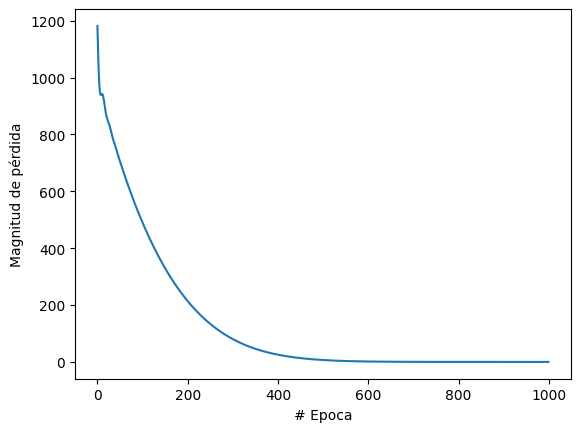

In [10]:
# Vemos resultado de func de pérdida nos dice que tan mal están los resultados en c/vuelta que dió
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
# vemos que con 500 o 600 vueltas casi no hay pérdida, no mejora mucho

In [18]:
print("Hagamos predicción 100ºC que no están en el array")
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + "ºF")

Hagamos predicción 100ºC que no están en el array
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
El resultado es [[211.74406]]ºF
